In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy.stats import pearsonr, kendalltau, spearmanr
from sklearn.model_selection import train_test_split

from models import kNN, sNN, sggNN

/home/josegfer/miniconda3/envs/lusiadas/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
H = torch.load('data/H_train.pt')
y = torch.load('data/y_train.pt')
s = torch.load('data/s_train.pt')

In [3]:
H_train, H_test, y_train, y_test, s_train, s_test = train_test_split(H, y, s, test_size = 0.1, random_state = 42)

# knn

In [4]:
# grid = [1, 2, 3]
grid = np.unique(np.logspace(start = 0, stop = 3, num = 150, dtype = int))
log = []
for param in tqdm(grid):
    model = kNN(k = param)
    model.fit(H_train, y_train)
    q = model.q(H_test, y_test, progress = False)
    log.append([pearsonr(q, s_test)[0], kendalltau(q, s_test)[0], spearmanr(q, s_test)[0]])

100%|██████████| 104/104 [30:44<00:00, 17.74s/it]


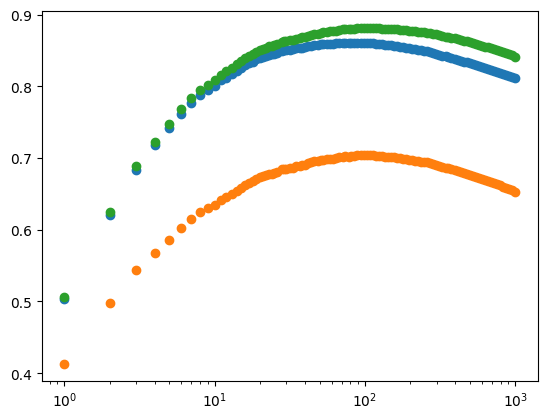

In [5]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
plt.scatter(grid, log[:, 1]);
plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/knn.png')

In [6]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(94, 0.860840606005664)

In [7]:
grid[np.argmax(log[:, 1])], np.max(log[:, 1])

(98, 0.7040032075406917)

In [8]:
grid[np.argmax(log[:, 2])], np.max(log[:, 2])

(113, 0.8814630014716293)

# snn

In [49]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sNN(tau = param)
    model.fit(H_train, y_train)
    q = model.q(H_test, y_test, progress = False)
    log.append([pearsonr(q, s_test)[0], kendalltau(q, s_test)[0], spearmanr(q, s_test)[0]])

100%|██████████| 100/100 [07:51<00:00,  4.71s/it]


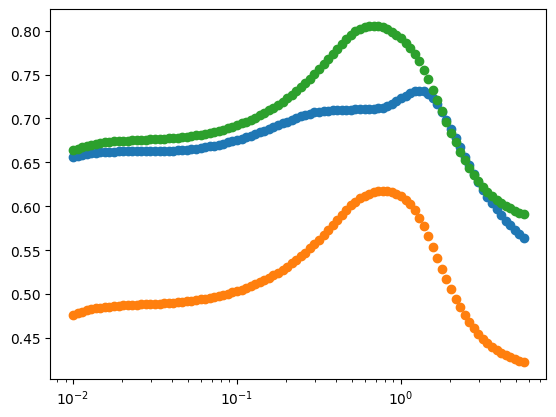

In [50]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
plt.scatter(grid, log[:, 1]);
plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/snn.png')

In [51]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(1.291549665014884, 0.7318433515861318)

In [52]:
grid[np.argmax(log[:, 1])], np.max(log[:, 1])

(0.774263682681127, 0.6172494745848964)

In [53]:
grid[np.argmax(log[:, 2])], np.max(log[:, 2])

(0.6812920690579611, 0.8054996249786491)

# sggnn

## p = 128

In [14]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_128.pt')
    model.fit(H_train, y_train)
    q = model.q(H_test, y_test, progress = False)
    log.append([pearsonr(q, s_test)[0], kendalltau(q, s_test)[0], spearmanr(q, s_test)[0]])

  1%|          | 1/100 [00:05<08:36,  5.22s/it]

100%|██████████| 100/100 [04:56<00:00,  2.97s/it]


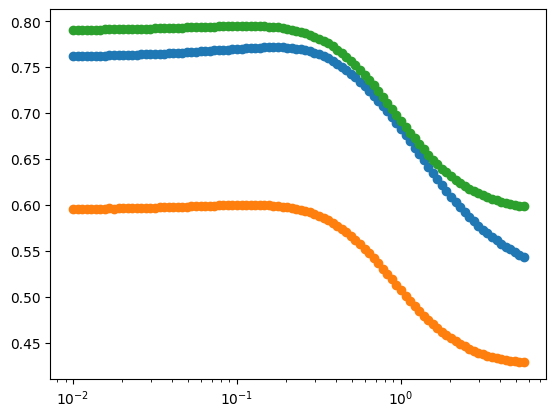

In [15]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
plt.scatter(grid, log[:, 1]);
plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [16]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.16681005372000582, 0.7714872153176039)

In [17]:
grid[np.argmax(log[:, 1])], np.max(log[:, 1])

(0.11364636663857249, 0.6000152879489673)

In [18]:
grid[np.argmax(log[:, 2])], np.max(log[:, 2])

(0.11364636663857249, 0.7947934172407304)

## p = 64

In [19]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_64.pt')
    model.fit(H_train, y_train)
    q = model.q(H_test, y_test, progress = False)
    log.append([pearsonr(q, s_test)[0], kendalltau(q, s_test)[0], spearmanr(q, s_test)[0]])

  2%|▏         | 2/100 [00:05<04:48,  2.94s/it]

100%|██████████| 100/100 [04:52<00:00,  2.92s/it]


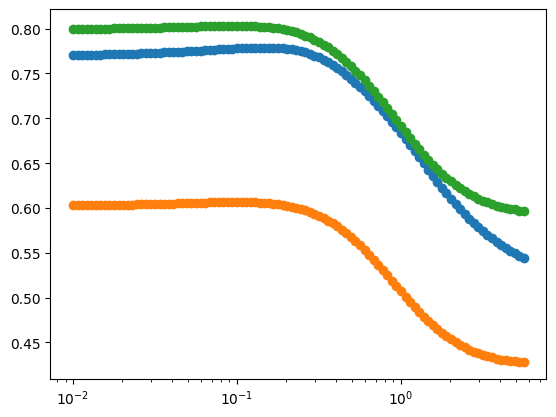

In [20]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
plt.scatter(grid, log[:, 1]);
plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [21]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.1467799267622069, 0.7788717665153967)

In [22]:
grid[np.argmax(log[:, 1])], np.max(log[:, 1])

(0.1, 0.6066116073532244)

In [23]:
grid[np.argmax(log[:, 2])], np.max(log[:, 2])

(0.1, 0.8030500434726214)

## p = 32

In [24]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_32.pt')
    model.fit(H_train, y_train)
    q = model.q(H_test, y_test, progress = False)
    log.append([pearsonr(q, s_test)[0], kendalltau(q, s_test)[0], spearmanr(q, s_test)[0]])

  2%|▏         | 2/100 [00:05<04:48,  2.95s/it]

100%|██████████| 100/100 [04:52<00:00,  2.92s/it]


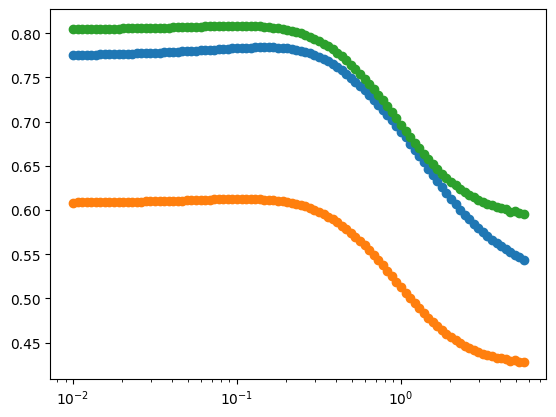

In [25]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
plt.scatter(grid, log[:, 1]);
plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [26]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.1467799267622069, 0.7841801426931847)

In [27]:
grid[np.argmax(log[:, 1])], np.max(log[:, 1])

(0.10660504989847921, 0.6124527579457466)

In [28]:
grid[np.argmax(log[:, 2])], np.max(log[:, 2])

(0.1, 0.808360635573661)

## p = 16

In [29]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_16.pt')
    model.fit(H_train, y_train)
    q = model.q(H_test, y_test, progress = False)
    log.append([pearsonr(q, s_test)[0], kendalltau(q, s_test)[0], spearmanr(q, s_test)[0]])

  2%|▏         | 2/100 [00:05<04:45,  2.91s/it]

100%|██████████| 100/100 [04:51<00:00,  2.92s/it]


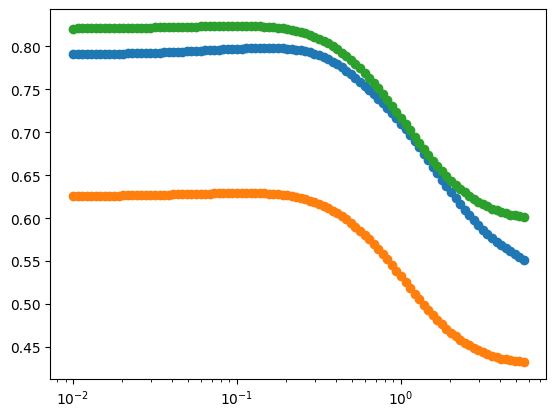

In [30]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
plt.scatter(grid, log[:, 1]);
plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [31]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.156474814165802, 0.7980455969322368)

In [32]:
grid[np.argmax(log[:, 1])], np.max(log[:, 1])

(0.11364636663857249, 0.6291249793936565)

In [33]:
grid[np.argmax(log[:, 2])], np.max(log[:, 2])

(0.09380418666398145, 0.8235529045335348)

## p = 8

In [34]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_8.pt')
    model.fit(H_train, y_train)
    q = model.q(H_test, y_test, progress = False)
    log.append([pearsonr(q, s_test)[0], kendalltau(q, s_test)[0], spearmanr(q, s_test)[0]])

  2%|▏         | 2/100 [00:05<04:47,  2.94s/it]

100%|██████████| 100/100 [04:51<00:00,  2.91s/it]


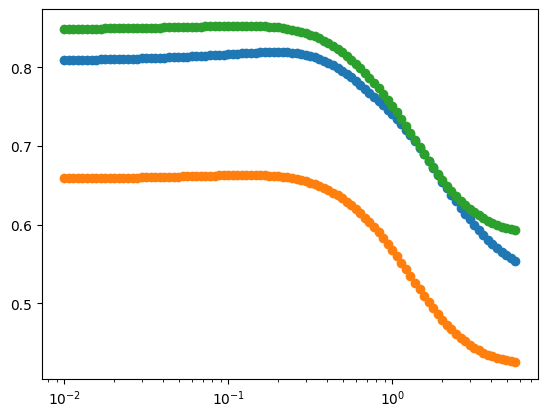

In [35]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
plt.scatter(grid, log[:, 1]);
plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [36]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.18957356524063754, 0.8194188547306454)

In [37]:
grid[np.argmax(log[:, 1])], np.max(log[:, 1])

(0.12115276586285882, 0.6629395054028361)

In [38]:
grid[np.argmax(log[:, 2])], np.max(log[:, 2])

(0.11364636663857249, 0.8527785510165862)

## p = 4

In [39]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_4.pt')
    model.fit(H_train, y_train)
    q = model.q(H_test, y_test, progress = False)
    log.append([pearsonr(q, s_test)[0], kendalltau(q, s_test)[0], spearmanr(q, s_test)[0]])

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [05:00<00:00,  3.00s/it]


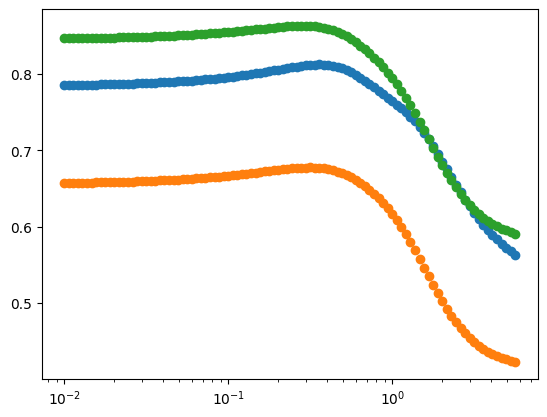

In [40]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
plt.scatter(grid, log[:, 1]);
plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [41]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.3593813663804626, 0.8124205634743449)

In [42]:
grid[np.argmax(log[:, 1])], np.max(log[:, 1])

(0.31622776601683794, 0.6774408907913406)

In [43]:
grid[np.argmax(log[:, 2])], np.max(log[:, 2])

(0.2782559402207124, 0.8628603436393575)

## p = 2

In [44]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_2.pt')
    model.fit(H_train, y_train)
    q = model.q(H_test, y_test, progress = False)
    log.append([pearsonr(q, s_test)[0], kendalltau(q, s_test)[0], spearmanr(q, s_test)[0]])

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [07:00<00:00,  4.20s/it]


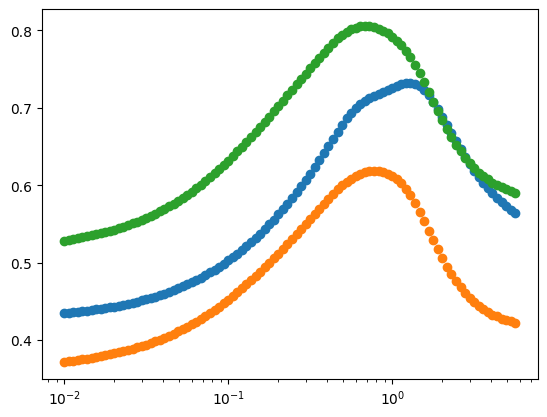

In [45]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
plt.scatter(grid, log[:, 1]);
plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [46]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(1.291549665014884, 0.732411805405219)

In [47]:
grid[np.argmax(log[:, 1])], np.max(log[:, 1])

(0.774263682681127, 0.618456436025463)

In [48]:
grid[np.argmax(log[:, 2])], np.max(log[:, 2])

(0.6812920690579611, 0.8058934954550813)